# Project 1

Fertility rate and wage gap we dont know what the Q is yet.

Copyright 2018 Mahima Beltur and Jocelyn Jimenez

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


QUESTION:
What will the employment rate for mothers be in 50 years? How will the wage gap be affected?

In [6]:
# STATE: 

In [182]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *


In [183]:
#Importing csv file of Fertility data into code
import csv
file = open ('Fertility data.csv')
table= csv.reader(file)
time= [] #Setting emtpy sets for variables 'years' and 'fertility'
fertility= []
for i, row in enumerate(table): #adding values to 'years' and 'fertility' going through each row of the csv file individually
    if i > 0:
        year = float(row[0])
        rate = float(row[1])
        time.append(year) #adding each value onto the end of the list
        fertility.append(rate)   

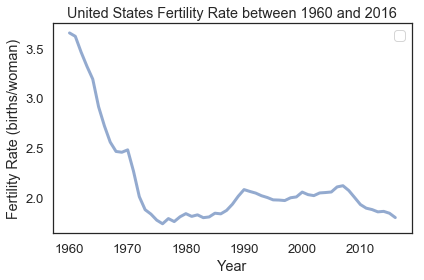

In [184]:
#Plotting Fertility Data
plot(time, fertility) 
decorate(xlabel='Year', 
             ylabel='Fertility Rate (births/woman)',
             title='United States Fertility Rate between 1960 and 2016')

In [185]:
file2 = open('Employment.csv') #Importing csv file of employed mothers data into code
table2= csv.reader(file2)
timez= [] #Setting emtpy sets for variables 'time' and the income ratio, 'percentage'
percentageW = []
percentageM = []
for i, row in enumerate(table2): #adding values to 'years' and 'fertility' going through each row of the csv file individually
    if i > 0:
        times = float(row[0])
        fraction = float(row[1])
        percentage = float(row[2])
        timez.append(times) #adding each value onto the end of the list
        percentageW.append(fraction)  
        percentageM.append(percentage)

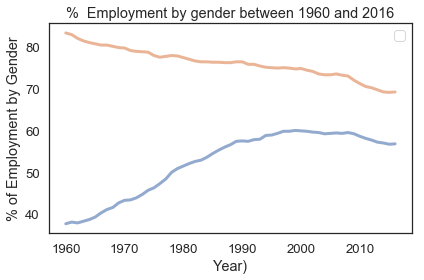

In [186]:
#Plotting Employment data
plot(timez, percentageW)
plot(timez, percentageM)
decorate(xlabel='Year)', 
             ylabel='% of Employment by Gender',
             title='%  Employment by gender between 1960 and 2016') 

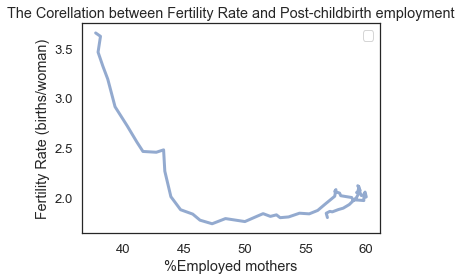

In [187]:
#Plotting Employed Mothers data against Fertility data
plot(percentageW, fertility )
decorate(xlabel='%Employed mothers', 
             ylabel='Fertility Rate (births/woman)',
             title='The Corellation between Fertility Rate and Post-childbirth employment')

In [188]:
# def plot_results(fertility, ratio, title):
#     plot(fertility, ":", label = "Fertility Rate")
#     plot(ratio, "--", label = "Wage ratio")
   
#     decorate(xlabel='Year', 
#              ylabel='um',
#              title=title)



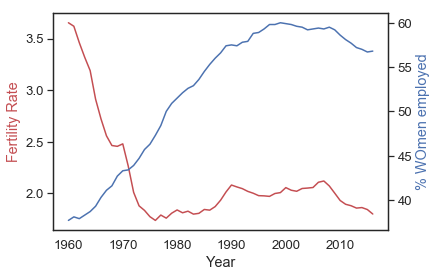

In [247]:
x = time

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x,fertility,'r-')
ax2.plot(x, percentageW, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fertility Rate', color = 'r')
ax2.set_ylabel('% WOmen employed', color = 'b')
plt.show()

#label axes in specified intervals between 1960 and 2016
#different axis for fertility rate and ratio

In [248]:
#happy = [item[0] for item in percentageW]
first_women = percentageW[-57]
first_men = percentageM[-57]
baby = fertility[-57]

3.654

In [249]:
init = State(women = first_women, 
              men = first_men, 
              fertility_rate = baby )



,values
women,37.700
men,83.300
fertility_rate,3.654


In [280]:
system = System(growthM = rate_changeM,
              growthW = 0.4,
              women_quitting_rate = 0.1, 
              birth_rate = 0.1211,
              infant_mortality = 0.0058,
              t_0 = 1960,
              t_end = 2066,
              init = init
              )

,values
growthM,0.251786
growthW,0.4
women_quitting_rate,0.1
birth_rate,0.1211
infant_mortality,0.0058
t_0,1960
t_end,2066
init,women 37.700 men 83....


In [314]:
def update_func1(state, t, system):
    
    change_fertility = (system.birth_rate - system.infant_mortality)*state.fertility_rate
    #change_women = (state.women + system.growthW - system.women_quitting_rate) 
    change_women = state.women + (system.growthW * state.women) - (system.women_quitting_rate * state.women)
    change_men = state.men - system.growthM
    
    return State(women = change_women, men = change_men, fertility_rate = change_fertility)

In [315]:
state = update_func1(init, system.t_0, sys1)

,values
women,43.355000
men,83.048214
fertility_rate,0.421306


In [316]:
def run_simulation(system, update_func):
    results1 = TimeSeries()
    results2 = TimeSeries()
    results3 = TimeSeries()
    
    
    state = system.init
  
    for t in linrange(system.t_0, system.t_end):
        state = update_func1(state, t, system)
        results1[t] = state.women
        results2[t] = state.men
        results3[t] = state.fertility_rate
    print(system.t_end)
    return results1, results2, results3


2066


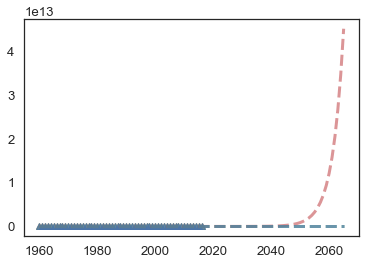

In [317]:
results = run_simulation(system, update_func1)
years = linrange(1960,2066, 1)
plot(time, percentageW,'r^', label = 'Employed Women')
plot(time, percentageM,'g^', label = 'Employed men')
plot(time, fertility,'b^', label = 'Fertility Rate')
plot(years, results[0], 'r--', label = 'Employed Women (Model)')
plot(years, results[1],'g--', label = 'Employed Men (Model)')
plot(years, results[2], 'b--', label = 'Fertility Rate (Model)')





In [309]:
file2 = open ('Male-FemaleRatio.csv') #Importing csv file of Income Inequality data into code
table2= csv.reader(file2)
time= [] #Setting emtpy sets for variables 'time' and the income ratio, 'ratio'
ratio= []
for i, row in enumerate(table2): #adding values to 'time' and 'ratio' going through each row of the csv file individually
    if i > 0:
        if row[0]:#There was an empty cell that could not be found or deleted; the data will only be added if the cell has data
            times = float(row[0])
            time.append(times)  #adding each value onto the end of the list
        if row[1]:
            wage = float(row[1])
            ratio.append(wage)   #adding each value onto the end of the list 

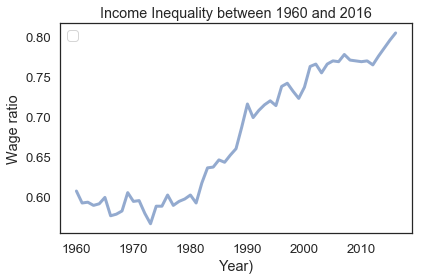

In [57]:
#Plotting Income Inequality Data
plot(time, ratio)
decorate(xlabel='Year)', 
             ylabel='Wage ratio',
             title='Income Inequality between 1960 and 2016') 